In [6]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [7]:
df_kapp = pd.read_excel('../results/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()

cases = pd.read_csv('../input/data_list_batch.txt', sep='\t')
cases = cases.data_id.to_list()
df_kapp = df_kapp.loc[:, cases]

In [8]:
vivo_0 = pd.core.series.Series(dtype='float64')
for i in df_kapp.index:
    vals = [v for v in df_kapp.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        vivo_0[i] = np.max(vals)

In [9]:
df_kcat = pd.read_excel('../input/rxn_enz_kcat_kapp.xlsx')
idx = [df_kcat.rxn_id[i] + '_' + df_kcat.direction[i] for i in df_kcat.index]
df_kcat.index = idx
df = df_kcat[df_kcat['kcat_invitro (1/s)'].isnull() == False]
df = df[df.organism.str.contains('saccharomyces cerevisiae', case=False)]
idx = df.index.to_list()

vitro_0 = pd.core.series.Series(dtype='float64')
for i in idx:
    vitro_0[df_kcat.rxn_id[i] + '_' + df_kcat.direction[i]] = df_kcat.loc[i, 'kcat_invitro (1/s)']

In [10]:
df_note = pd.read_excel('../input/vivo_efficient_literature_records.xlsx')
df_note.index = df_note.Reaction.to_list()
df_note = df_note[df_note.evidence != 'None']

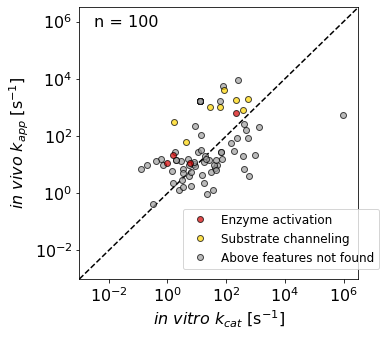

In [15]:
idx = sorted(list(set(vivo_0.index) & set(vitro_0.index)))
vivo_act = df_note[df_note.activation.isnull() == False].index.to_list()
vivo_channel = df_note[df_note.channeling.isnull() == False].index.to_list()

vivo_act = [i for i in vivo_act if i in idx]
vivo_channel = [i for i in vivo_channel if i in idx]
vivo_none = [i for i in idx if i not in vivo_act+vivo_channel]

fig,ax = plt.subplots(figsize=(5,5))
alpha = 0.7

vivos = [vivo_act, vivo_channel, vivo_none]
colors = ['#d50000', '#ffd600', '#9e9e9e']

for i in range(0, len(vivos)):
    vivo = np.log10(vivo_0[vivos[i]])
    vitro = np.log10(vitro_0[vivos[i]])
    ax.scatter(vitro, vivo, color=colors[i], edgecolor='k', alpha=alpha, zorder=5-i);

lims = [-3,6.5]
ticks = [-2, 0, 2, 4, 6]
ticklabels = ['$10^{' + str(i) + '}$' for i in ticks]
ax.set_xlim(lims);
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=16)
ax.set_ylim(lims);
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=16)

ax.text(-2.5, 5.8, 'n = 100', fontsize=16)

line = mlines.Line2D([-3, 7], [-3, 7], color='k', linestyle='--', zorder=0)
ax.add_line(line);

ax.set_xlabel('$in$ $vitro$ $k_{cat}$ [s$^{-1}$]', fontsize=16);
ax.set_ylabel('$in$ $vivo$ $k_{app}$ [s$^{-1}$]', fontsize=16);

handles = [mlines.Line2D([], [], color='#d50000', lw=0, marker='o', markeredgecolor='k', alpha=alpha),
           mlines.Line2D([], [], color='#ffd600', lw=0, marker='o', markeredgecolor='k', alpha=alpha),
           mlines.Line2D([], [], color='#9e9e9e', lw=0, marker='o', markeredgecolor='k', alpha=alpha)]
legend_labels = ['Enzyme activation', 'Substrate channeling', 'Above features not found']
ax.legend(handles, legend_labels, ncol=1, bbox_to_anchor=(0.35,0.28), fontsize=12);

plt.savefig('./figures/kapp_all_vivo_vs_vitro_scatter.png', transparent=True, bbox_inches='tight')

In [51]:
vivo_0['G6PDH2i_c_FWD']

133.882751038822

In [44]:
vitro_0['FECOOR_m_FWD']

1500.0

In [25]:
i in viv

487.0

In [48]:
i = 'FECOOR_m_FWD'
v_vitro = vitro_0[i]
rxn = i[:-4]
name = model.reactions.get_by_id(rxn).name
gpr = model.reactions.get_by_id(rxn).gene_name_reaction_rule

if i in vivo_0.index:
    v_vivo = vivo_0[i]
    print('\t'.join([i, name, gpr, str(v_vivo), str(v_vitro)]))

FECOOR_m_FWD	ferrocytochrome-c:oxygen oxidoreductase	(COX1 and COX2 and COX3 and COX9 and CYC7 and COX4 and COX13 and COX6 and COX5B and COX12 and COX8 and COX7) or (COX1 and COX2 and COX3 and COX9 and CYC7 and COX4 and COX13 and COX6 and COX12 and COX8 and COX7 and COX5A) or (COX1 and COX2 and COX3 and COX9 and COX4 and COX13 and COX6 and COX5B and CYC1 and COX12 and COX8 and COX7) or (COX1 and COX2 and COX3 and COX9 and COX4 and COX13 and COX6 and CYC1 and COX12 and COX8 and COX7 and COX5A) or (COX1 and COX2 and COX3 and COX9 and COX23 and COX20 and COX18 and COX16 and COX11 and COX19)	812.559293223925	375.0


In [12]:
for i in vitro_0.index:
    v_vitro = vitro_0[i]
    rxn = i[:-4]
    name = model.reactions.get_by_id(rxn).name
    gpr = model.reactions.get_by_id(rxn).gene_name_reaction_rule
    
    if i in vivo_0.index:
        v_vivo = vivo_0[i]
        if v_vivo > 1.1*v_vitro:
            print('\t'.join([i, name, gpr, str(v_vivo), str(v_vitro)]))

13GS_c_FWD	1,3-beta-glucan synthase	(FKS1 and ) or (GSC2 and )	38.6142772467268	0.55
ACGAMPM_c_FWD	phosphoacetylglucosamine mutase	PCM1	5.1919900551619	1.79
ACGK_m_FWD	acetylglutamate kinase	ARG5,6	10.4666030542428	7.7
ACOADS160_rm_FWD	palmitoyl-CoA desaturase (n-C16:0CoA -> n-C16:1CoA), ER membrane	OLE1	17.7752915856412	0.35
ACOADS180_rm_FWD	stearoyl-CoA desaturase (n-C18:0CoA -> n-C18:1CoA), ER membrane	OLE1	17.7752915856412	0.35
ALATA_L_m_REV	L-alanine transaminase	ALT1	223.268235794451	8.64
ALATRS_c_FWD	alanyl-tRNA synthetase	ALA1	6.73325189680004	3.3
ANPRT_c_FWD	anthranilate phosphoribosyltransferase	TRP4	13.0083891407792	2.9
ATPS_m_FWD	ATP synthase	(ATP8 and ATP6 and OLI1 and ATP1 and ATP3 and ATP16 and ATP5 and TIM11 and ATP17 and ATP2 and ATP7 and ATP14 and ATP18 and ATP4 and ATP15) or (ATP8 and ATP6 and OLI1 and ATP1 and ATP3 and ATP16 and ATP5 and ATP17 and ATP2 and ATP7 and ATP14 and ATP18 and ATP4 and ATP15 and ATP20) or (ATP8 and ATP6 and OLI1 and ATP1 and ATP3 and ATP16 a

In [32]:
import cobra
model = cobra.io.load_json_model('../../build_GAMS_model/input/GSM_y834_hvd_v6_rba.json')

Using license file /home/hvdinh16/Workspace/Softwares/gurobi910/linux64/gurobi.lic
Academic license - for non-commercial use only - expires 2022-08-08


In [34]:
model.reactions.GLUTRS_c

Reaction identifier,GLUTRS_c
Name,glutamyl-tRNA synthetase
Memory address,0x07f8e49c66d10
Stoichiometry,atp_c + glu__L_c + trnaglu_c --> amp_c + glutrna_c + ppi_c ATP [cytoplasm] + L-glutamate [cytoplasm] + tRNA(Glu) [cytoplasm] --> AMP [cytoplasm] + Glu-tRNA(Glu) [cytoplasm] + diphosphate [cytoplasm]
GPR,YGL245W and YGL105W
Lower bound,0.0
Upper bound,1000.0


In [60]:
idx_check = x[x > 1].index
for i in idx_check:
    print('\t'.join([i, df_kcat.subsystem_group1p5[i], str(round(10**x[i],1))]))

13GS_c_FWD	Carbohydrate metabolism	475.3
ACGAMPM_c_FWD	Carbohydrate metabolism	10.6
ACOADS160_rm_FWD	Fatty acid metabolism	241.9
ACOADS180_rm_FWD	Fatty acid metabolism	241.9
ALATA_L_m_REV	Amino acid metabolism	130.3
ALATRS_c_FWD	tRNA charging	12.5
ANPRT_c_FWD	Amino acid metabolism	32.6
ATPS_m_FWD	Citric acid cycle and energy metabolism	761.8
BPNT_c_FWD	Other metabolism	12.5
CYSTGL_c_FWD	Amino acid metabolism	12.1
DMATT_c_FWD	Lipid metabolism	12.5
DPMVD_c_FWD	Lipid metabolism	18.4
FBA_c_FWD	Glycolytic pathways	84.3
FECRq6_m_FWD	Citric acid cycle and energy metabolism	910.5
GAPD_c_FWD	Glycolytic pathways	65.9
GLNTRS_c_FWD	tRNA charging	23.8
GLUDy_c_FWD	Amino acid metabolism	100.5
GLUTRS_c_FWD	tRNA charging	42.4
GLYOX_c_FWD	Other metabolism	10.2
GLYTRS_c_FWD	tRNA charging	71.4
GRTT_c_FWD	Lipid metabolism	10.9
GTPCI_c_FWD	Cofactor biosynthesis and metabolism	35.8
HCITS_m_FWD	Amino acid metabolism	80.8
HEX1_c_FWD	Glycolytic pathways	736.8
HISTRS_c_FWD	tRNA charging	83.0
ILETRS_c_FWD	tRNA ch

In [15]:
idx

['13GS_c_FWD',
 'AASADy_c_FWD',
 'AATA_c_FWD',
 'ACGAMPM_c_FWD',
 'ACGK_m_FWD',
 'ACOADS160_rm_FWD',
 'ACOADS180_rm_FWD',
 'ADNK1_c_FWD',
 'ALATA_L_m_REV',
 'ALATRS_c_FWD',
 'ALCD2i1_c_FWD',
 'ANPRT_c_FWD',
 'ARGTRS_c_FWD',
 'ASNTRS_c_FWD',
 'ASPK_c_FWD',
 'ASPTRS_c_FWD',
 'ATPPRT_c_FWD',
 'ATPS_m_FWD',
 'BPNT_c_FWD',
 'CDPDAGS_rm_FWD',
 'CHLPCTD_c_FWD',
 'CHOLK_c_FWD',
 'CHORM_c_FWD',
 'CS_m_FWD',
 'CYSTGL_c_FWD',
 'CYSTRS_c_FWD',
 'CYSTS_c_FWD',
 'DHFRi_c_FWD',
 'DHNPA2i_m_FWD',
 'DHORDfum_c_FWD',
 'DMATT_c_FWD',
 'DOLPMT_c_FWD',
 'DPMVD_c_FWD',
 'DTMPK_c_FWD',
 'DUTPDP_c_FWD',
 'ENO_c_FWD',
 'FBA_c_FWD',
 'FECRq6_m_FWD',
 'FKYNH_c_FWD',
 'GALUi_c_FWD',
 'GAPD_c_FWD',
 'GF6PTA_c_FWD',
 'GK1_c_FWD',
 'GLNS_c_FWD',
 'GLNTRS_c_FWD',
 'GLUDy_c_FWD',
 'GLUTRS_c_FWD',
 'GLYOX_c_FWD',
 'GLYTRS_c_FWD',
 'GRTT_c_FWD',
 'GTHO_c_FWD',
 'GTPCI_c_FWD',
 'HCITS_m_FWD',
 'HCO3E_c_FWD',
 'HEX1_c_FWD',
 'HICITD_m_FWD',
 'HISTD_c_FWD',
 'HISTRS_c_FWD',
 'IG3PS_c_FWD',
 'ILETRS_c_FWD',
 'IMPC_c_FWD',
 

In [8]:
vivo[(vivo < -1)]

GTHO_c_FWD   -2.650724
dtype: float64

In [7]:
vivo['SAM24MT_c_FWD']

0.8521263980747535

In [17]:
vitro

13GS_c_FWD          -0.259637
AASADy_c_FWD         1.620136
AATA_c_FWD           1.264818
ACGAMPM_c_FWD        0.252853
ACGK_m_FWD           0.886491
                       ...   
TRDR_c_FWD           1.640481
TYRTRS_c_FWD         0.783904
UAGDP_c_FWD          1.187521
VALTRS_c_FWD        -0.698970
lumpFACS160_c_FWD    0.301030
Length: 118, dtype: float64

In [10]:
vitro

13GS_c_FWD            0.55
AASADy_c_FWD         41.70
AATA_c_FWD           18.40
ACGAMPM_c_FWD         1.79
ACGK_m_FWD            7.70
                     ...  
TRDR_c_FWD           43.70
TYRTRS_c_FWD          6.08
UAGDP_c_FWD          15.40
VALTRS_c_FWD          0.20
lumpFACS160_c_FWD     2.00
Length: 118, dtype: float64

In [6]:
idx

['13GS_c_FWD',
 'AASADy_c_FWD',
 'AATA_c_FWD',
 'ACGAMPM_c_FWD',
 'ACGK_m_FWD',
 'ACOADS160_rm_FWD',
 'ACOADS180_rm_FWD',
 'ADNK1_c_FWD',
 'ALATA_L_m_REV',
 'ALATRS_c_FWD',
 'ALCD2i1_c_FWD',
 'ANPRT_c_FWD',
 'ARGTRS_c_FWD',
 'ASNTRS_c_FWD',
 'ASPK_c_FWD',
 'ASPTRS_c_FWD',
 'ATPPRT_c_FWD',
 'ATPS_m_FWD',
 'BPNT_c_FWD',
 'CDPDAGS_rm_FWD',
 'CHLPCTD_c_FWD',
 'CHOLK_c_FWD',
 'CHORM_c_FWD',
 'CS_m_FWD',
 'CYSTGL_c_FWD',
 'CYSTRS_c_FWD',
 'CYSTS_c_FWD',
 'DHFRi_c_FWD',
 'DHNPA2i_m_FWD',
 'DHORDfum_c_FWD',
 'DMATT_c_FWD',
 'DOLPMT_c_FWD',
 'DPMVD_c_FWD',
 'DTMPK_c_FWD',
 'DUTPDP_c_FWD',
 'ENO_c_FWD',
 'FBA_c_FWD',
 'FECRq6_m_FWD',
 'FKYNH_c_FWD',
 'GALUi_c_FWD',
 'GAPD_c_FWD',
 'GF6PTA_c_FWD',
 'GK1_c_FWD',
 'GLNS_c_FWD',
 'GLNTRS_c_FWD',
 'GLUDy_c_FWD',
 'GLUTRS_c_FWD',
 'GLYOX_c_FWD',
 'GLYTRS_c_FWD',
 'GRTT_c_FWD',
 'GTHO_c_FWD',
 'GTPCI_c_FWD',
 'HCITS_m_FWD',
 'HCO3E_c_FWD',
 'HEX1_c_FWD',
 'HICITD_m_FWD',
 'HISTD_c_FWD',
 'HISTRS_c_FWD',
 'IG3PS_c_FWD',
 'ILETRS_c_FWD',
 'IMPC_c_FWD',
 

In [7]:
len(idx)

118

In [35]:
import cobra
model = cobra.io.load_json_model('../../scRBA_build_GAMS_model/input/GSM_y834_hvd_v6_rba.json')

Using license file /home/hvdinh16/Workspace/Softwares/gurobi910/linux64/gurobi.lic
Academic license - for non-commercial use only - expires 2022-08-08


In [45]:
for rxn in model.reactions:
    if rxn.id[:4] == 'NDPK':
        print(rxn.id, rxn.reaction)

NDPK3_c atp_c + cdp_c --> adp_c + ctp_c
NDPK8_c atp_c + dadp_c --> adp_c + datp_c
NDPK7_c atp_c + dcdp_c --> adp_c + dctp_c
NDPK5_c atp_c + dgdp_c --> adp_c + dgtp_c
NDPK4_c atp_c + dtdp_c --> adp_c + dttp_c
NDPK1_c atp_c + gdp_c --> adp_c + gtp_c
NDPK9_c atp_c + idp_c --> adp_c + itp_c
NDPK10_c atp_c + didp_c --> adp_c + ditp_c
NDPK6_c atp_c + dudp_c --> adp_c + dutp_c
NDPK2_c atp_c + udp_c --> adp_c + utp_c


In [63]:
model.reactions.BPNT_c

Reaction identifier,BPNT_c
Name,"3',5'-bisphosphate nucleotidase"
Memory address,0x07efe176547d0
Stoichiometry,"h2o_c + pap_c --> amp_c + pi_c H2O [cytoplasm] + adenosine 3',5'-bismonophosphate [cytoplasm] --> AMP [cytoplasm] + phosphate [cytoplasm]"
GPR,YOL064C
Lower bound,0.0
Upper bound,1000.0
